##Exercicio 07 - Lista 06

In [ ]:
# Import all necessary libraries.
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, auc, classification_report
import seaborn as sns
from scipy.special import erfc

In [ ]:
seed = 42
np.random.seed(seed)

In [ ]:
mapping_table = [-3-3j, -3-1j, -3+3j, -3+1j, -1-3j, -1-1j, -1+3j, -1+1j, 3-3j, 3-1j, 3+3j, 3+1j, 1-3j,
1-1j, 1+3j, 1+1j]
def mod(bits):
  symbols = np.zeros((len(bits),),dtype=complex)
  for i in range(0,len(bits)): symbols[i] = mapping_table[bits[i]]/np.sqrt(10)
  return symbols

In [ ]:
# Generate N 4-bit symbols.
N = 100000
bits = np.random.randint(0,16,N)
# Modulate the binary stream into 16QAM symbols.
symbols = mod(bits)

In [ ]:
#Create Es/N0 vector

EsN0dB = np.arange(0,22,2)

ser_simu = np.zeros(len(EsN0dB))
ser_theo = np.zeros(len(EsN0dB))


#Passando os símbolos através de um canal AWGN
for idx in range(0,len(EsN0dB)):
    print('Es/N0 dB:', EsN0dB[idx])
    
    EsN0Lin = 10.0**(-(EsN0dB[idx]/10.0))
    noise = np.sqrt(1.0/2.0)*(np.random.randn(N, 1) + 1j*np.random.randn(N, 1))
    noise = np.sqrt(EsN0Lin)*noise

    yn = []
    error = 0

    for i in range(0, N):
        yn.append(symbols[i] + noise[i])

    Yn = np.array(yn)
    ynr = Yn.real
    yni = Yn.imag
    
    Ynoise = np.c_[ynr, yni]
    
    y = np.array(symbols)
    yr = y.real
    yi = y.imag
    Y = np.c_[yr, yi]
    
    clf = KNeighborsClassifier(10, weights='distance')

    clf.fit(Y, bits)

    bits_pred = clf.predict(Ynoise)
    bits_pred = bits_pred.reshape(N,1)

    error=0
    
    for i in range(0,N):
        if(bits_pred[i] == bits[i]):
            error = error
        else:
            error = error + 1
    
    ser_simu[idx] = 1.0 * error / N
    print(error)
    print(ser_simu)

    M = 16
    k = np.sqrt(3/(2*(M-1)))

    ser_theo[idx] = (2*(1-(1/np.sqrt(M)))*erfc(k*np.sqrt(10.0**(EsN0dB[idx]/10.0))))-((1-(2/np.sqrt(M))+(1/M))*erfc(k*np.sqrt(10.0**(EsN0dB[idx]/10.0)))**2)

Es/N0 dB: 0
74014
[0.74014 0.      0.      0.      0.      0.      0.      0.      0.
 0.      0.     ]
Es/N0 dB: 2
67719
[0.74014 0.67719 0.      0.      0.      0.      0.      0.      0.
 0.      0.     ]
Es/N0 dB: 4
59299
[0.74014 0.67719 0.59299 0.      0.      0.      0.      0.      0.
 0.      0.     ]
Es/N0 dB: 6
48004
[0.74014 0.67719 0.59299 0.48004 0.      0.      0.      0.      0.
 0.      0.     ]
Es/N0 dB: 8
35433
[0.74014 0.67719 0.59299 0.48004 0.35433 0.      0.      0.      0.
 0.      0.     ]
Es/N0 dB: 10
22196
[0.74014 0.67719 0.59299 0.48004 0.35433 0.22196 0.      0.      0.
 0.      0.     ]
Es/N0 dB: 12
10912
[0.74014 0.67719 0.59299 0.48004 0.35433 0.22196 0.10912 0.      0.
 0.      0.     ]
Es/N0 dB: 14
3681
[0.74014 0.67719 0.59299 0.48004 0.35433 0.22196 0.10912 0.03681 0.
 0.      0.     ]
Es/N0 dB: 16
729
[0.74014 0.67719 0.59299 0.48004 0.35433 0.22196 0.10912 0.03681 0.00729
 0.      0.     ]
Es/N0 dB: 18
63
[7.4014e-01 6.7719e-01 5.9299e-01 4.8004e-

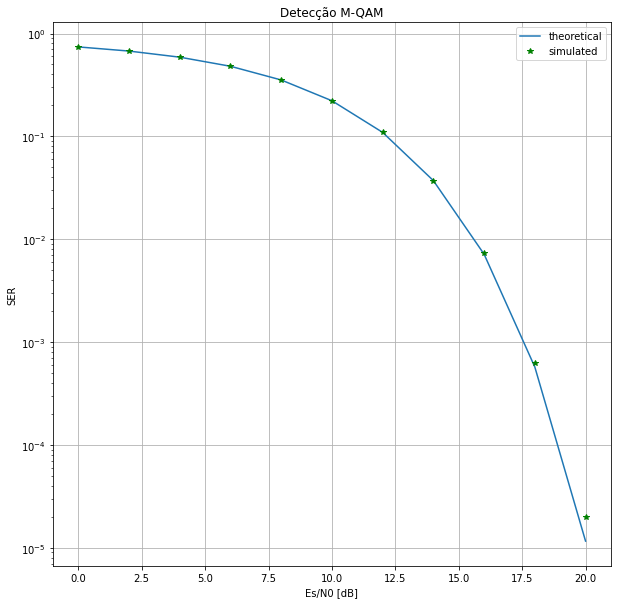

In [ ]:
fig = plt.figure(figsize=(10,10))

plt.plot(EsN0dB, ser_theo, label='theoretical')
plt.plot(EsN0dB, ser_simu, 'g*', label='simulated')

plt.xscale('linear')
plt.yscale('log')

plt.xlabel('Es/N0 [dB]')
plt.ylabel('SER')

plt.grid(True)

plt.title('Detecção M-QAM')

plt.legend()


plt.show()

###De acordo com as informações no gráfico acima, é possível verificar que a curva obtida pelos dados simulados é semelhante a curva teórica.